In [1]:
"""
!pip install patchify
!pip install opencv-python
!pip install matplotlib
"""

'\n!pip install patchify\n!pip install opencv-python\n!pip install matplotlib\n'

In [8]:
import cv2
import matplotlib.pyplot as plt
from patchify import patchify

In [4]:
filename_img = "C:/Users/RAZER/Desktop/Test/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0.2500_main.png"
filename_mask = "C:/Users/RAZER/Desktop/Test/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0.2500_mask.png"
image = cv2.imread(filename_img, flags=cv2.IMREAD_COLOR)
mask = cv2.imread(filename_mask, flags=cv2.IMREAD_COLOR)



(1991, 3626, 3)
(1991, 3626, 3)


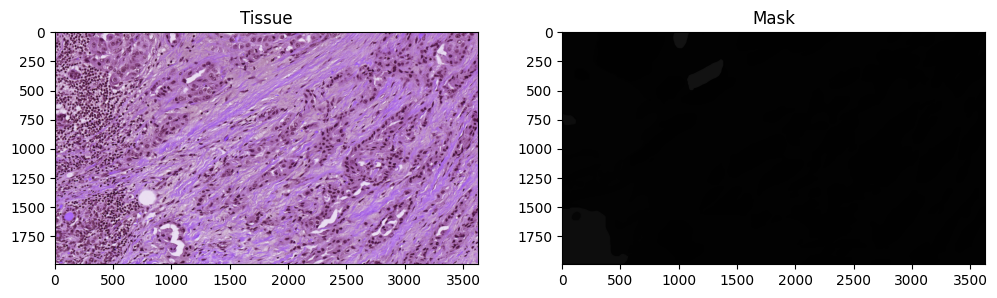

In [7]:

tissue_img = cv2.imread(filename_img)
tissue_img = cv2.cvtColor(tissue_img, cv2.COLOR_BGR2RGB)

mask_img = cv2.imread(filename_mask)
mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2RGB)

#Verify (tissue, mask) shape
print(tissue_img.shape)
print(mask_img.shape)


#Plot (tissue, mask) side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first image on the left subplot
axes[0].imshow(cv2.cvtColor(tissue_img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Tissue')

# Plot the second image on the right subplot
axes[1].imshow(cv2.cvtColor(mask_img, cv2.COLOR_BGR2RGB))
axes[1].set_title('Mask')
plt.show()

In [69]:
patches_img = patchify(tissue_img, (100,100,3), step=150)

In [70]:
patches_img.shape

(13, 24, 1, 100, 100, 3)

In [71]:
row = patches_img.shape[0]
col = patches_img.shape[1]

In [72]:
gather_img = []

for i in range(row):
    for j in range(col):
        get_patches_img = patches_img[i,j,:,:,:]
        gather_img.append(get_patches_img)

In [73]:
print("Total slice/patch: ",len(gather_img))

Total slice/patch:  312


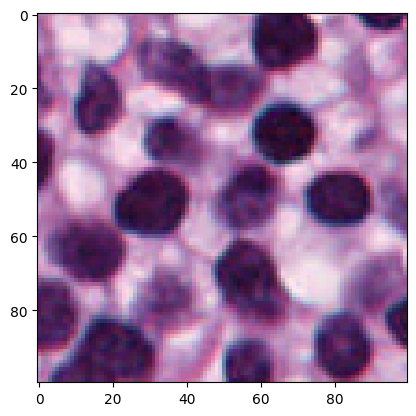

In [80]:
plt.imshow(gather_img[1][0])

#Image Show with Slice

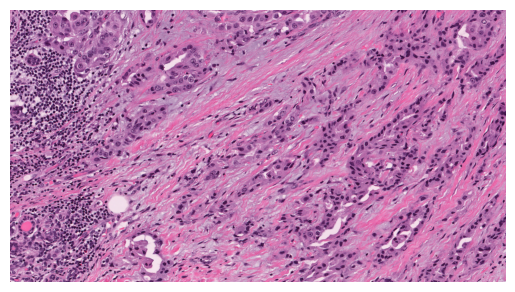

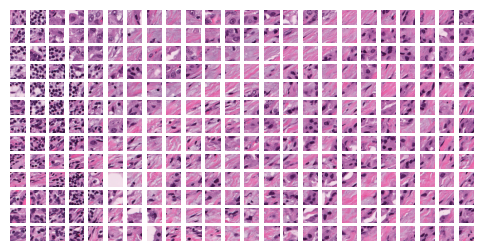

In [85]:
plt.imshow(tissue_img)
plt.axis('off')

fig1, ax1 = plt.subplots(nrows=row,ncols=col,figsize=(6,3))

a=0

for R in range(row):
    for C in range(col):
        ax1[R, C].imshow(gather_img[a][0])
        ax1[R,C].axis("off")
        a+=1
        

#Saving

In [86]:
saving_path = "C:/Users/RAZER/Desktop/Test/patch_file/"

a=0
for R in range(row):
    for C in range(col):
        status = cv2.imwrite(saving_path+str(R)+"_"+str(C)+'image.png',gather_img[a][0])
        print("Image written to file-system : ",status)
        a+=1

Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
Image written to file-system :  True
I